In [1]:
import numpy as np
from profiles import *
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
from fitter import MinuitFitter
from utils import *

In [ ]:
homedir = '/home/andrea/Desktop/work/DWARF/Jvalue/project1/test/Isotrop_Core_nonPlum'
MockSize = 100
dataSize = 100
dset = 1
# enter model choice - cf. casedir (options 1,2,3,4)
mod = 1
theta = 0.5
D = 100
data = load_gaia(homedir, MockSize, dataSize, dset, mod, D, True)

In [ ]:
R = data[0]
v = data[1]
dv = data[2]
rh = data[-3]
r0_true = data[-2]
rho0_true = data[-1]

In [ ]:
dm = build_profile('Zhao', a=1., b=3., c=0.) # Cored DM profile
st = build_profile('plummer', **{'c':1, 'rh':rh}) # non-Plummer Stellar profile
kr = build_kernel('iso') # isotropic kernel

In [ ]:
dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf, 'errs':False}
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)
LL = GaussianLikelihood(kinematic, Sigma)
LL.set_free('dm_r0')

In [ ]:
global global_loglike
global_loglike = LL
M = MinuitFitter(LL)

In [ ]:
M.set_value('J',19)
M.set_value('dm_r0',rh/2.)
M.set_error('J',0.01)
M.set_bound('J',(15,22))
M.set_error('dm_r0',0.01)
M.set_bound('dm_r0',(kinematic[0].min(),kinematic[0].max()))
M.settings['print_level'] = 1

In [ ]:
M.set_free('dm_c')
M.set_error('dm_c',0.01)
M.set_bound('dm_c',(0.001,5))

In [ ]:
M.set_minuit(**{'tol':1e2,'strategy':2})

In [ ]:
M.migrad_min()

In [ ]:
M.minos_profile('J')

In [2]:
import pylab as plt
from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq
%matplotlib inline

In [3]:
J_array = np.asarray(J)
Like_array = np.asarray(L)
new_Like = interp(J_array,Like_array)

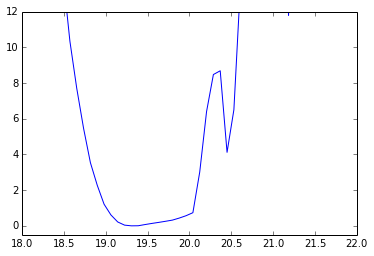

In [4]:
new_J = np.linspace(J_array.min(),J_array.max())
plt.plot(new_J, new_Like(new_J))
plt.ylim(-0.5,12);